本文中，我们将使用*Python*模块[gensim](http://radimrehurek.com/gensim/models/word2vec.html#id6)对文本训练，生成词向量（即将每个词用向量表示）。使用的数据集为Mikolov所使用的[text8](http://mattmahoney.net/dc/text8.zip)，训练模型为*skip-gram*, *CBOW*。如果你对词向量的概念不甚熟悉，可以拜读下皮果提的[CSDN博客](http://blog.csdn.net/itplus/article/details/37969519)，他深入浅出的介绍了一些列的背景知识、相关概念以及理论推导。

In [1]:
from collections import Counter
from gensim.models import word2vec 
#from glove import Glove 
#from glove import Corpus 
import argparse
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


首先，我们读取本地的*text8*数据，关于*gensim*里面的词向量建模工具*word2vec*，可以参看官方文档。

In [2]:
sentences = word2vec.Text8Corpus('text8')

## CBOW模型

CBOW模型主要思想是给定中心词的上下文环境来推测该中心词，按照官方文档要求，如果我们将*word2vec*函数里面的*sg*参数设置为0，则模型就是*CBOW*（Continuous Bag-Of-Words Model)。这里，我们词向量的长度设置为80，窗户宽度为5，最小频数为3（低于此的词都会被过滤），采用的是*Negative Resampling*方法。

In [5]:
model = word2vec.Word2Vec(sentences, size=80, sg=1, window=5, min_count=3, workers=4, alpha=0.02, seed=111, negative=6)

我们可以查看下词向量，比如"computer"。

In [6]:
model['computer']

array([ 0.02650725, -0.50969082, -0.45741862, -0.57654041,  0.24540503,
        0.34786275,  0.54966879,  0.06881291,  0.12406903,  0.59712881,
       -0.16445976,  0.25820193, -0.29091042, -0.05825159, -0.11755049,
       -0.22156967, -0.58553743,  0.51318651,  0.10418297, -0.18416588,
       -0.01798754, -0.17588602, -0.35560519,  0.35723653, -0.64044029,
       -0.05625425,  0.59157145,  0.9115082 , -0.46166426, -0.20308408,
       -0.2604202 , -0.14637367,  0.05905502,  0.52400994, -0.12585539,
        0.30059505,  0.08809536,  0.32757786,  0.24022754,  0.32001728,
       -0.11834349, -0.0465848 , -0.15400819,  0.41470206, -0.49311188,
       -0.36285856,  0.08120495, -0.29717207, -0.87051404, -0.05560758,
       -0.76499486, -0.47871196, -0.18425287, -0.09065096,  0.38515952,
       -0.03486208, -0.22293885, -0.38933757, -0.17483954, -0.2424411 ,
       -1.00261235, -1.09542084, -0.46337864, -0.0720495 ,  0.12884505,
        0.03935419,  0.02693575,  0.26077726,  0.33151829, -0.30

我们可以对这些词向量进行可视化，利用PCA降维。为方便起见，我们取词频靠前的500个单词及其词向量，然后用散点图显示。

In [7]:
#统计词频
word_freq = Counter(model.wv.vocab.keys())
stopwords = ['the', 'of', 'and', 'a', 'to', 's']

In [8]:
#选取词频靠前的500个单词，除去连接词
freq_words = word_freq.most_common(500)
freq_words = [k for k,v in freq_words if k not in stopwords]

In [9]:
#匹配词的向量
freq_words_vec = [model[word] for word in freq_words]

In [10]:
freq_words_vec = np.array(freq_words_vec)

In [11]:
#将词向量降维为2维向量
model_TSNE = TSNE(n_components=2, random_state=0)
freq_words_vec_2D = model_TSNE.fit_transform(freq_words_vec)

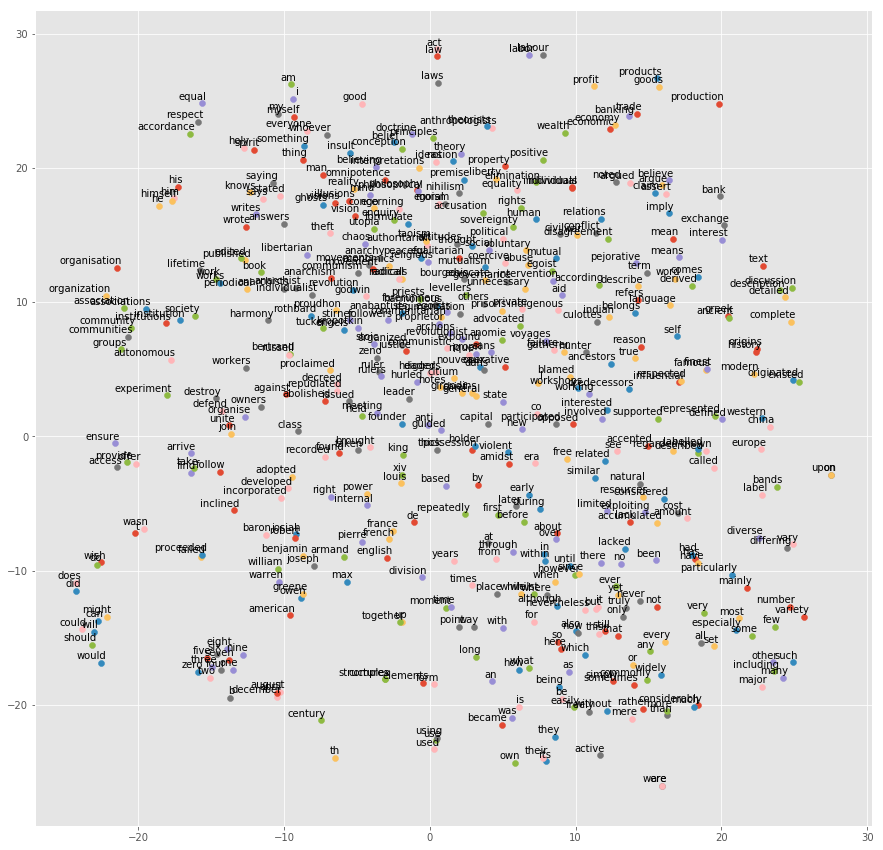

In [12]:
plt.style.use('ggplot')#设置ggplot风格的背景
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    #显示散点图并进行标注
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
  plt.show()
plot(freq_words_vec_2D, freq_words)

从词向量散点图可以看出类似词语之间的聚类性，比如"school"、"university"、"college"三个单词距离很近。26个字母也分布在紧邻区域。

下面，我们可以利用*gensim*自带的函数之间查看下不同单词之间的相似度。

In [44]:
model.similarity('boy', 'girl')

0.79814493436215184

In [45]:
y1 = model.similarity("woman", "man")
print(u"woman和man的相似度为：", y1)
print("--------\n")

woman和man的相似度为： 0.774512396138
--------



In [46]:
# 计算某个词的相关词列表
y2 = model.most_similar("nice", topn=20)  # 20个最相关的
print(u"和nice最相关的词有：\n")
for item in y2:
    print(item[0], item[1])
print("--------\n")

和nice最相关的词有：

sorry 0.675086259841919
yeah 0.6636122465133667
funny 0.6508450508117676
tonight 0.6507736444473267
hey 0.6392889022827148
fucking 0.6388955116271973
estas 0.6382187008857727
dear 0.6379721164703369
wanna 0.6358113884925842
okay 0.6340839862823486
yours 0.63329017162323
dirty 0.6323931217193604
thank 0.6323081254959106
shit 0.6318766474723816
folks 0.6280492544174194
lovely 0.6262786984443665
mess 0.6242364048957825
everybody 0.6236780881881714
fun 0.6215744614601135
vingti 0.6189566850662231
--------



In [33]:
# 寻找对应关系
print(' "man" is to "father" as "woman" is to ...? \n')
y3 = model.most_similar(['woman', 'father'], ['man'], topn=3)
for item in y3:
    print(item[0], item[1])
print("--------\n")

 "man" is to "father" as "woman" is to ...? 

mother 0.8537393808364868
wife 0.7895943522453308
grandmother 0.7757685780525208
--------



In [34]:
more_examples = ["he his she", "big bigger bad", "going went being"]
for example in more_examples:
    a, b, x = example.split()
    predicted = model.most_similar([x, b], [a])[0][0]
    print("'%s' is to '%s' as '%s' is to '%s'" % (a, b, x, predicted))
print("--------\n")

'he' is to 'his' as 'she' is to 'her'
'big' is to 'bigger' as 'bad' is to 'worse'
'going' is to 'went' as 'being' is to 'was'
--------



In [19]:
# 保存模型，以便重用
model.save("text8.model")
# 对应的加载方式
# model_2 = word2vec.Word2Vec.load("text8.model")

## Skip-gram模型

Skip-gram实际上与CBOW模型很类似，只不过这里是给定中心词来推断上下文环境。在*gensim*里面只需修改参数便可以实现训练过程的变换。

# Fetch 20Newsgroup Data

In [3]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', 
                                  shuffle=True, random_state=11)
newsgroups_test = fetch_20newsgroups(subset='test', 
                                  shuffle=True, random_state=11)

In [4]:
print("\n".join(newsgroups_train.data[0].split("\n")))

From: EEI.EEIIHY@memo.ericsson.SE (353-1-2800455)
Subject: help
Organization: The Internet
Lines: 5
NNTP-Posting-Host: enterpoop.mit.edu
To: XPERT@EXPO.LCS.MIT.EDU

--- Received from EEI.EEIIHY  353-1-2800455         93-04-26 12.28
  -> VAX.XPERT..EXPO.LCS.MIT.EDU..INET
  -: - - - - - - - - - - > MAIL USER IN VAX AND INTERNET
help




In [5]:
#数据预处理
import string
import re
def preProcessor(s):
    #s = s.encode('utf-8')
    s = re.sub('['+string.punctuation+']', ' ', s)
    s = re.sub('['+string.digits+']', ' ', s)
    s = re.sub('\n', ' ', s)
    s = s.lower()
    #s = s.translate(string.punctuation)
    return s

In [6]:
preProcessor(newsgroups_train.data[0])

'from  eei eeiihy memo ericsson se                 subject  help organization  the internet lines    nntp posting host  enterpoop mit edu to  xpert expo lcs mit edu      received from eei eeiihy                                            vax xpert  expo lcs mit edu  inet                            mail user in vax and internet help  '

In [7]:
from sklearn.feature_extraction.text import  TfidfVectorizer
#Obtain tf-idf vector for each article
#remove stopwords in Enlgish
tfidfVectorizer = TfidfVectorizer(stop_words='english', min_df=5, preprocessor=preProcessor, ngram_range=(1, 1))
X_train_tfidf = tfidfVectorizer.fit_transform(newsgroups_train.data)
X_train_tfidf.shape

(11314, 22931)

In [8]:
X_test_tfidf = tfidfVectorizer.transform(newsgroups_test.data)

In [9]:
news_words = tfidfVectorizer.get_feature_names()
len(news_words)

22931

In [10]:
news_words[:20]

['aa',
 'aaa',
 'aamir',
 'aardvark',
 'aargh',
 'aario',
 'aaron',
 'aas',
 'aau',
 'ab',
 'abad',
 'abandon',
 'abandoned',
 'abbey',
 'abbot',
 'abbott',
 'abbreviation',
 'abbreviations',
 'abc',
 'abd']

## TiIdf 模型分类

In [50]:
#利用朴素贝叶斯方法分类
import time
#Train the model
from sklearn.naive_bayes import MultinomialNB
start = time.time()
clf_nb = MultinomialNB(0.1).fit(X_train_tfidf, newsgroups_train.target)
#Test the model
predicted = clf_nb.predict(X_test_tfidf)
end = time.time()
print('Accuracy of Naive Bayes: {:.3f}'.format(np.mean(predicted == newsgroups_test.target)))
print("Training and testing time (secs): {:.3f}".format(end - start))

Accuracy of Naive Bayes: 0.813
Training and testing time (secs): 0.182


In [13]:
from sklearn.svm import SVC
clf_svc = SVC(C=1)
clf_svc.fit(X_train_tfidf, newsgroups_train.target)
#Test the model
predicted = clf_nb.predict(X_test_tfidf)
print('Accuracy of Naive Bayes: {:.3f}'.format(np.mean(predicted == newsgroups_test.target)))

Accuracy of Naive Bayes: 0.792


In [13]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=50, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.01)

mlp.fit(X_train_tfidf,newsgroups_train.target)
mlp.score(X_test_tfidf, newsgroups_test.target)

Iteration 1, loss = 0.94611318
Iteration 2, loss = 0.04349712
Iteration 3, loss = 0.02139305
Iteration 4, loss = 0.01738670
Iteration 5, loss = 0.01515811
Iteration 6, loss = 0.01390248
Iteration 7, loss = 0.01417262
Iteration 8, loss = 0.01202115
Iteration 9, loss = 0.01144084
Iteration 10, loss = 0.01099263
Iteration 11, loss = 0.01027455
Iteration 12, loss = 0.00994708
Iteration 13, loss = 0.01058786
Iteration 14, loss = 0.00953119
Iteration 15, loss = 0.00911338
Iteration 16, loss = 0.00870838
Iteration 17, loss = 0.00852431
Iteration 18, loss = 0.00853961
Iteration 19, loss = 0.00770002
Iteration 20, loss = 0.00747934
Iteration 21, loss = 0.00754292
Iteration 22, loss = 0.00860220
Iteration 23, loss = 0.00740559
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


0.84864577801380781

## 词向量进行分类

In [55]:
#选择text8词库中的单词
news_words_selected = set(news_words).intersection(set(model.wv.vocab.keys()))

In [56]:
len(news_words_selected)

19148

In [57]:
#抽取部分单词的tf-idf向量列
col_indice = [tfidfVectorizer.vocabulary_.get(w) for w in news_words_selected] 
X_train_tfidf_selected = X_train_tfidf[:, col_indice]
X_test_tfidf_selected = X_test_tfidf[:, col_indice]

In [58]:
#将每个文档所有单词词向量按照权重进行叠，最终生成的向量来表示文档
def buildDocVector(doc_tfidf, Word_model, size):
    vec = np.zeros((1, size))    
    count = 0
    for i, word in enumerate(list(news_words_selected)):
        try:
            if doc_tfidf[0, i] != 0:           
                vec += Word_model[word].reshape((1, size)) * doc_tfidf[0, i]
                count += 1
        except:
            print('Error', word, i)
            continue
    if count != 0:
        vec /= count
    return vec

In [59]:
#将每个文档转化成词向量模式，然后连接成特征矩阵
X_train_vec = np.concatenate([buildDocVector(doc_tfidf.toarray(), model, 80)
               for doc_tfidf in X_train_tfidf_selected])

In [60]:
X_train_vec.shape

(11314, 80)

In [61]:
X_test_vec = np.concatenate([buildDocVector(doc_tfidf.toarray(), model, 80)
               for doc_tfidf in X_test_tfidf_selected])

In [62]:
#from sklearn.preprocessing import scale
#X_train_vec = scale(X_train_vec)
#X_test_vec = scale(X_test_vec)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
svc_model = SVC(random_state=1)
rf_model = RandomForestClassifier(random_state=111)
rf_model.fit(X_train_vec, newsgroups_train.target)
predicted = rf_model.predict(X_test_vec)
print('Accuracy of Random Forest: {:.3f}'.format(np.mean(predicted == newsgroups_test.target)))

Accuracy of Random Forest: 0.380


In [63]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=100, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-7, random_state=1,
                    learning_rate_init=.02)

mlp.fit(X_train_vec,newsgroups_train.target)
mlp.score(X_test_vec, newsgroups_test.target)

Iteration 1, loss = 1.89792491
Iteration 2, loss = 1.44623024
Iteration 3, loss = 1.33964406
Iteration 4, loss = 1.27258738
Iteration 5, loss = 1.20921365
Iteration 6, loss = 1.17660530
Iteration 7, loss = 1.15155436
Iteration 8, loss = 1.10620399
Iteration 9, loss = 1.07297536
Iteration 10, loss = 1.06811371
Iteration 11, loss = 1.03899425
Iteration 12, loss = 1.01677328
Iteration 13, loss = 0.99951053
Iteration 14, loss = 0.97967077
Iteration 15, loss = 0.95179835
Iteration 16, loss = 0.94775823
Iteration 17, loss = 0.92532486
Iteration 18, loss = 0.90075186
Iteration 19, loss = 0.89957912
Iteration 20, loss = 0.88170148
Iteration 21, loss = 0.86462647
Iteration 22, loss = 0.84136688
Iteration 23, loss = 0.83495854
Iteration 24, loss = 0.82127047
Iteration 25, loss = 0.81497891
Iteration 26, loss = 0.80802770
Iteration 27, loss = 0.78573831
Iteration 28, loss = 0.78822264
Iteration 29, loss = 0.76348017
Iteration 30, loss = 0.74800035
Iteration 31, loss = 0.74213805
Iteration 32, los

0.52257036643653743

## 利用本地20新闻数据训练词向量

In [11]:
def cleanText(corpus):
    corpus = [preProcessor(z) for z in corpus]
    corpus = [z.lower().replace('\n','').split() for z in corpus]    
    return corpus
train_corpus = cleanText(newsgroups_train.data)   
test_corpus = cleanText(newsgroups_test.data)   

In [12]:
news_w2v = word2vec.Word2Vec(size=128, sg=0, window=5, min_count=3, workers=4)
news_w2v.build_vocab(train_corpus)
start_alpha = 0.005
end_alpha = 0.005
for i in range(5):
    news_w2v.train(train_corpus, total_examples=news_w2v.corpus_count, epochs=news_w2v.iter,
                  start_alpha=start_alpha, end_alpha=end_alpha)
    start_alpha -= 0.001
    end_alpha = start_alpha

In [13]:
tfidfVectorizer.vocabulary_.get('world')

22485

In [14]:
#将每个文档所有单词词向量按照权重进行叠加
#考虑单词权重
def buildDocVector(news_w2v, text, text_index, tfidf, size):
    vec = np.zeros((1, size))    
    count = 0
    for word in text:
        try:
            word_index = tfidfVectorizer.vocabulary_.get(word)
            w = tfidf[text_index, word_index]
            vec += news_w2v[word].reshape((1, size)) * np.exp(w)
            count += 1
        except:
            #print('Error', word)
            continue
    if count != 0:
        vec /= count
    return vec

In [15]:
#将每个文档转化成词向量模式，然后连接成特征矩阵
X_train_vec = np.concatenate([buildDocVector(news_w2v, z, i, X_train_tfidf, 128)
               for i, z in enumerate(train_corpus)])

In [16]:
X_test_vec = np.concatenate([buildDocVector(news_w2v, z, i, X_test_tfidf, 128)
               for i, z in enumerate(test_corpus)])

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=2, random_state=111)
lr.fit(X_train_vec, newsgroups_train.target)
predicted = lr.predict(X_test_vec)
print('Accuracy of Random Forest: {:.3f}'.format(np.mean(predicted == newsgroups_test.target)))

Accuracy of Random Forest: 0.625


分类的效果不好，很可能样本数量还不够；另外词向量在这里面时静态的，也就是训练完成之后作为静态值输入到分类模型中，可以考虑动态的模型；最后，这里面都是取得向量平均值，没有考虑单词的权重。